# Homework_3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# displaying the df_sp500_close dataset
df_sp500_close=pd.read_csv('SP500_close_price_no_missing.csv')
df_sp500_close

,date,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
0,2011-01-03,86.79,62.24,47.82,58.03,31.29,8.47,12.54,31.04,57.54,...,30.67,108.99,23.56,11.71,29.42,22.16,16.75,49.09,54.97,25.17
1,2011-01-04,86.67,62.20,48.27,56.22,31.51,8.77,12.60,31.20,56.49,...,30.48,112.39,23.66,11.40,29.54,22.05,16.59,48.34,54.24,24.76
2,2011-01-05,86.67,61.99,48.27,55.35,32.22,8.91,12.77,31.50,56.38,...,30.38,113.84,23.52,11.46,29.64,22.17,16.91,48.57,54.28,24.90
3,2011-01-06,86.14,61.72,48.17,53.53,32.27,8.69,12.99,32.09,56.07,...,29.94,114.67,23.50,11.46,30.14,22.16,17.06,48.91,52.60,24.83
4,2011-01-07,86.23,61.26,48.37,53.57,32.04,8.83,12.99,32.16,55.85,...,29.83,118.73,23.71,11.30,29.97,22.12,16.90,49.52,52.59,24.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,2014-12-25,166.96,116.03,45.70,28.06,74.74,2.65,13.81,89.59,61.94,...,85.68,150.90,36.23,14.08,44.09,34.26,50.65,72.79,114.11,28.52
1039,2014-12-26,166.26,116.21,45.85,28.22,74.67,2.65,14.22,89.84,61.94,...,86.32,150.37,36.58,14.14,43.92,34.24,50.86,73.14,114.17,28.56
1040,2014-12-29,166.71,116.47,45.60,28.69,74.13,2.66,14.37,89.75,62.00,...,86.77,153.00,37.25,14.14,43.79,34.50,50.53,73.56,113.50,28.72
1041,2014-12-30,165.84,116.27,45.69,28.76,73.10,2.63,14.02,90.14,61.98,...,86.23,151.20,36.38,14.01,43.55,34.75,51.22,73.28,114.57,28.67


In [3]:
# Column names displayed
df_sp500_close.columns

Index(['date', 'MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES', 'AET', 'AFL',
       ...
       'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'YHOO', 'YUM', 'ZMH',
       'ZION'],
      dtype='object', length=472)

In [4]:
df_sp500_close.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042
date,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-10,2011-01-11,2011-01-12,2011-01-13,2011-01-14,...,2014-12-18,2014-12-19,2014-12-22,2014-12-23,2014-12-24,2014-12-25,2014-12-26,2014-12-29,2014-12-30,2014-12-31
MMM,86.79,86.67,86.67,86.14,86.23,87.15,87.74,88.66,88.04,88.1,...,165.3,165.48,167.27,166.87,166.96,166.96,166.26,166.71,165.84,164.32
ACE,62.24,62.2,61.99,61.72,61.26,60.46,60.74,60.85,60.87,60.79,...,114.54,114.7,115.34,116.21,116.03,116.03,116.21,116.47,116.27,114.88
ABT,47.82,48.27,48.27,48.17,48.37,47.94,47.84,47.58,47.37,46.89,...,45.77,46.05,46.37,45.72,45.7,45.7,45.85,45.6,45.69,45.02
ANF,58.03,56.22,55.35,53.53,53.57,54.24,52.88,52.69,52.43,51.55,...,27.72,27.57,27.49,28.23,28.06,28.06,28.22,28.69,28.76,28.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XL,22.16,22.05,22.17,22.16,22.12,22.14,22.17,22.28,22.96,23.57,...,33.16,33.54,33.99,34.37,34.26,34.26,34.24,34.5,34.75,34.37
YHOO,16.75,16.59,16.91,17.06,16.9,16.6,16.58,16.65,16.75,16.81,...,50.91,50.88,51.15,50.02,50.65,50.65,50.86,50.53,51.22,50.51
YUM,49.09,48.34,48.57,48.91,49.52,49.59,49.27,49.15,48.9,47.84,...,71.74,71.17,72.46,72.68,72.79,72.79,73.14,73.56,73.28,72.85
ZMH,54.97,54.24,54.28,52.6,52.59,53.0,54.89,55.7,55.44,55.77,...,114.94,114.91,115.05,113.47,114.11,114.11,114.17,113.5,114.57,113.42


In [5]:
df_sp500_close= df_sp500_close.convert_dtypes()
df_sp500_close['date']= pd.to_datetime(df_sp500_close['date'])
df_sp500_close.reset_index(inplace=True)
df_sp500_close.dtypes

index             int64
date     datetime64[ns]
MMM             Float64
ACE             Float64
ABT             Float64
              ...      
XL              Float64
YHOO            Float64
YUM             Float64
ZMH             Float64
ZION            Float64
Length: 473, dtype: object

In [6]:
# displaying the df_sp500_ticket dataset
df_sp500_ticket = pd.read_csv('SP500_ticker.csv', encoding='latin1')
df_sp500_ticket

,ticker,company_name,sector
0,MMM,3M Co.,Industrials
1,ACE,ACE Limited,Financials
2,ABT,Abbott Laboratories,Health Care
3,ANF,Abercrombie & Fitch Company A,Consumer Discretionary
4,ADBE,Adobe Systems Inc,Information Technology
...,...,...,...
495,XL,XL Capital,Financials
496,YHOO,Yahoo Inc.,Information Technology
497,YUM,Yum! Brands Inc,Consumer Discretionary
498,ZMH,Zimmer Holdings,Health Care


In [7]:
# Column names displayed
df_sp500_ticket.columns

Index(['ticker', 'company_name', 'sector'], dtype='object')

In [8]:
df_sp500_ticket.transpose()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
ticker,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
company_name,3M Co.,ACE Limited,Abbott Laboratories,Abercrombie & Fitch Company A,Adobe Systems Inc,Advanced Micro Devices,AES Corp,Aetna Inc,AFLAC Inc,Agilent Technologies Inc,...,Wyndham Worldwide,Wynn Resorts Ltd,Xcel Energy Inc,Xerox Corp.,Xilinx Inc,XL Capital,Yahoo Inc.,Yum! Brands Inc,Zimmer Holdings,Zions Bancorp
sector,Industrials,Financials,Health Care,Consumer Discretionary,Information Technology,Information Technology,Utilities,Health Care,Financials,Health Care,...,Consumer Discretionary,Consumer Discretionary,Utilities,Information Technology,Information Technology,Financials,Information Technology,Consumer Discretionary,Health Care,Financials


# Problem 1

#### Fit a PCA model to log returns  (log return = log( Price [t+1]/Price [t]) derived from stock price data and complete the following tasks

In [9]:
# Calculate log returns with a small constant added to avoid division by zero
log_returns = np.log((df_sp500_close.set_index('date') + 1e-8) / (df_sp500_close.set_index('date').shift(1) + 1e-8))

# Drop the first row with NaN values
log_returns = log_returns.dropna()

In [10]:
# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Apply PCA
pca = PCA()
pca.fit(log_returns_standardized)

PCA()

#### Plot a scree plot which shows the distribution of variance contained in subsequent principal components sorted by their eigenvalues.


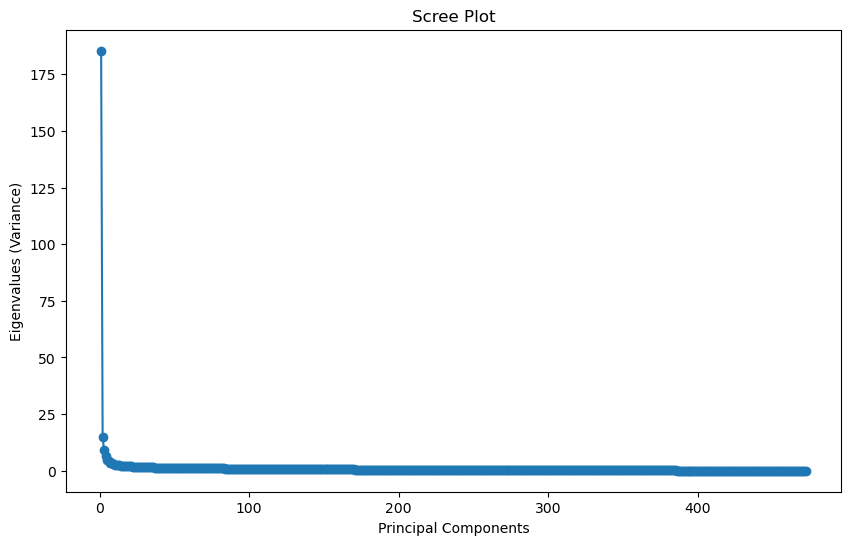

In [11]:
# Plot a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues (Variance)')
plt.show()

#### Create a second plot showing cumulative variance retained if top N components are kept after dimensionality reduction

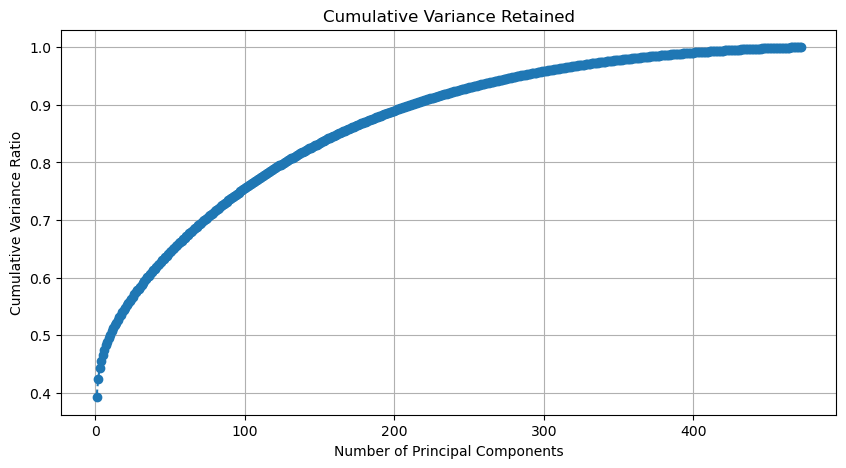

In [12]:
# Create a plot showing cumulative variance retained
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.grid(True)
plt.show()


#### No of principal components must be retained in order to capture at least 80% of the total variance in data

In [13]:
# Determine the number of principal components for 80% variance retention
n_components_80_percent = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(f"Number of components to retain at least 80% of the total variance: {n_components_80_percent}")


Number of components to retain at least 80% of the total variance: 127


## Analysis of principal components and weights

#### Compute and plot the time series of the 1st principal component and observe temporal patterns. Identify the date with the lowest value for this component and conduct a quick research on the Internet to see if you can identify event(s) that might explain the observed behavior

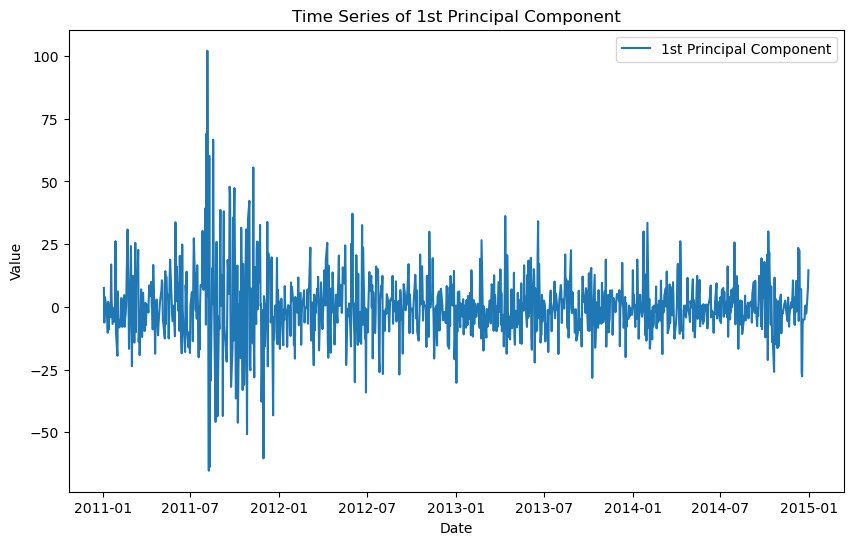

In [14]:
# Get the principal components
principal_components = pca.transform(log_returns_standardized)

# Extract the 1st principal component
pc1 = principal_components[:, 0]

dates = df_sp500_close['date'].iloc[:-1]

plt.figure(figsize=(10, 6))
plt.plot(dates, pc1, label='1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Rest of the code remains the same


#### Extract the weights from the PCA model for 1st and 2nd principal components

In [15]:
# Extract weights for the 1st and 2nd principal components
weights_pc1 = pca.components_[0, :]
weights_pc2 = pca.components_[1, :]
weights_pc1

array([ 0.00122878, -0.06148276, -0.05612283, -0.01338356, -0.03142792,
       -0.04873101, -0.03738987, -0.05189369, -0.04368004, -0.05903916,
       -0.05146817, -0.05518406, -0.05411708, -0.04362363, -0.0379499 ,
       -0.05502703, -0.05357577, -0.04042441, -0.05536899, -0.04513829,
       -0.03938984, -0.03666679, -0.04441609, -0.04092511, -0.05768944,
       -0.05357876, -0.04201154, -0.06338435, -0.04514661, -0.03825506,
       -0.03280341, -0.05222846, -0.05389431, -0.05285707, -0.05189057,
       -0.05046609, -0.02746059, -0.00855831, -0.05017393, -0.05091817,
       -0.05338745, -0.04309699, -0.04969019, -0.05551233, -0.04393462,
       -0.03207352, -0.04537779, -0.05116923, -0.03199802, -0.04889855,
       -0.02518025, -0.05309714, -0.05897588, -0.0460887 , -0.04877994,
       -0.05732612, -0.04962941, -0.03849046, -0.0504801 , -0.06121379,
       -0.02521228, -0.0266713 , -0.03642296, -0.06182825, -0.04243301,
       -0.0026297 , -0.05293281, -0.05373012, -0.0422932 , -0.03

In [16]:
weights_pc2

array([ 4.51141290e-03, -4.34365303e-03,  3.70141689e-02,  1.69717762e-02,
       -3.81215281e-02, -2.23602847e-02, -4.86069993e-02,  5.61959635e-02,
        3.38505488e-03, -7.14170218e-03, -4.08372487e-02, -1.16492753e-02,
       -1.59593492e-02, -5.63513954e-02, -3.51814139e-02, -4.68917518e-02,
       -5.42762615e-02,  1.77967812e-02,  2.08791706e-02, -5.98400408e-02,
        8.99890556e-02, -2.94751494e-02,  1.39128077e-01,  1.48985148e-01,
        8.49029165e-03, -1.59028250e-02,  3.90145803e-02, -1.80553924e-02,
        2.06071651e-02,  3.85594988e-02, -3.88779822e-02, -3.67247594e-02,
       -5.42139955e-02,  1.43923380e-02, -4.62785676e-02,  4.93890298e-02,
       -2.31542445e-02,  1.10232148e-03, -5.21545835e-02,  1.70997924e-02,
        1.96022325e-02,  6.00574175e-02, -3.84533889e-02,  8.41185672e-03,
       -6.25587480e-03,  1.94902878e-02,  5.99702341e-02, -1.13682249e-02,
        1.09959899e-02, -4.76881146e-02,  1.13396972e-02, -2.36150768e-02,
       -1.69924412e-02,  

#### Create a plot to show weights of the 1st principal component grouped by the industry sector (for example, you may draw a bar plot of mean weight per sector). Observe the distribution of weights (magnitudes, signs). Based on your observation, what kind of information do you think the 1st principal component might have captured

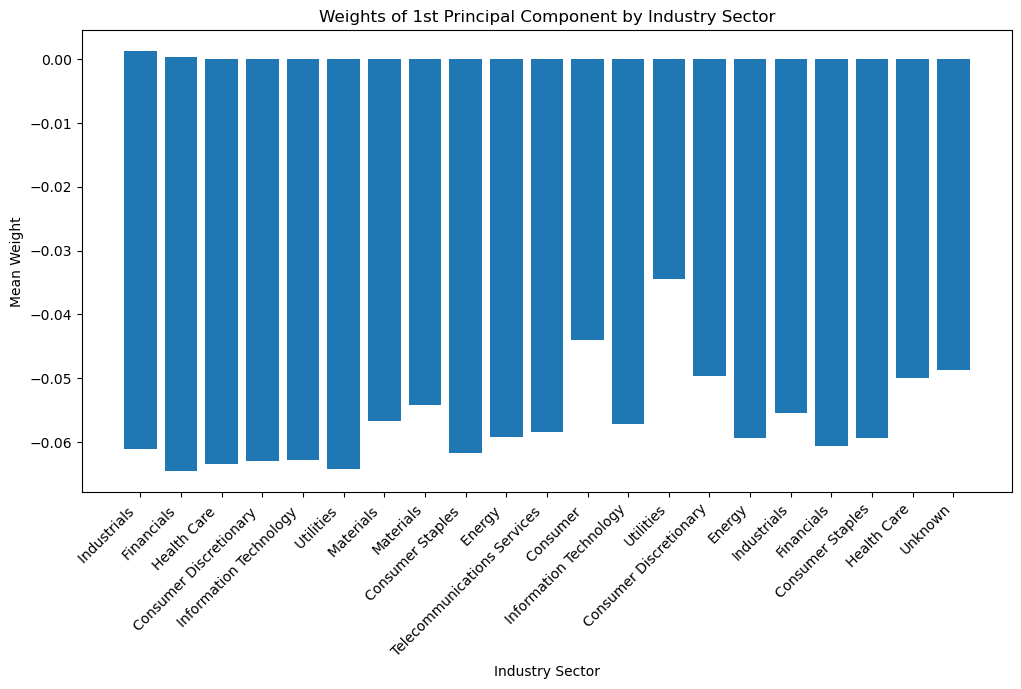

In [17]:
# Ensure the lengths match by considering only the relevant rows in df_sp500_ticket
df_weights_pc1 = pd.DataFrame({'Sector': df_sp500_ticket['sector'].iloc[:len(weights_pc1)], 'Weight_PC1': weights_pc1})

# Plot weights of the 1st principal component grouped by industry sector using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(df_weights_pc1['Sector'], df_weights_pc1['Weight_PC1'])
plt.title('Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### Make a similar plot for the 2nd principal component.  What kind of information do you think does this component reveal?

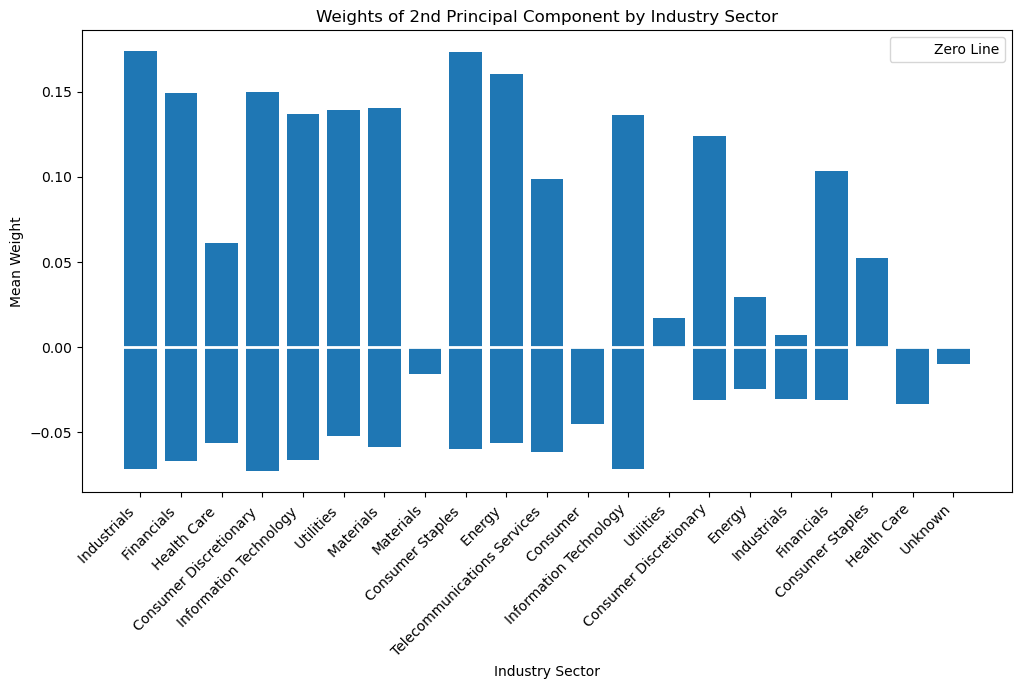

In [18]:
# Extract weights for the 2nd principal component
weights_pc2 = pca.components_[1, :]

# Ensure the lengths match by considering only the relevant rows in df_sp500_ticket
df_weights_pc2 = pd.DataFrame({'Sector': df_sp500_ticket['sector'].iloc[:len(weights_pc2)], 'Weight_PC2': weights_pc2})

# Plot weights of the 2nd principal component grouped by industry sector using matplotlib
plt.figure(figsize=(12, 6))
bars = plt.bar(df_weights_pc2['Sector'], df_weights_pc2['Weight_PC2'])

# Add a horizontal line at zero
plt.axhline(0, color='white', linestyle='-', linewidth=2, label='Zero Line')

plt.title('Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend()  # Show legend with the zero line
plt.show()


In [19]:
# Calculate explained variance for the 1st and 2nd principal components
explained_variance_pc1 = pca.explained_variance_ratio_[0]
explained_variance_pc2 = pca.explained_variance_ratio_[1]

print(f'Explained Variance - 1st Principal Component: {explained_variance_pc1:.2%}')
print(f'Explained Variance - 2nd Principal Component: {explained_variance_pc2:.2%}')


Explained Variance - 1st Principal Component: 39.24%
Explained Variance - 2nd Principal Component: 3.11%


#### Suppose we wanted to construct a new stock index using one principal component to track the overall market tendencies. Which of the two components would you prefer to use for this purpose, the 1st or the 2nd? Why?

> When the first principal component explains a significantly larger portion of the total variance compared to subsequent components, it indicates that it captures a substantial amount of the variability present in the original data. This makes it a valuable tool for constructing a new stock index that effectively tracks overall market tendencies. By condensing a substantial amount of information from the original dataset into a single variable, the first principal component provides a concise representation of the primary direction of market movements

### Problem 2 

In [20]:
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_bmi= pd.read_csv('BMI.csv')
df_bmi

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,fatpctg
0,22,160.8,62.4,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
1,22,170.6,80.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,23,153.9,69.3,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
3,23,157.1,70.4,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2,9.4
4,23,196.5,88.6,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,72,194.4,74.9,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,29.3
248,72,195.1,70.2,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.0
249,72,199.5,76.7,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,33.6
250,74,217.0,65.1,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9,31.9


In [21]:
# Split the data into features (X) and target variable (y)
X = df_bmi.drop('fatpctg', axis=1)
y = df_bmi['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Wrapper method

In [22]:
# Backward stepwise regression
model = LinearRegression()
backward_selector = RFE(model, n_features_to_select=1)
backward_selector = backward_selector.fit(X_train, y_train)
backward_features = X.columns[backward_selector.support_]
print("Wrapper Method - Backward Selection Features:", backward_features)

Wrapper Method - Backward Selection Features: Index(['Wrist'], dtype='object')


In [23]:
# Forward stepwise regression
forward_selector = RFE(model, n_features_to_select=1, step=1)
forward_selector = forward_selector.fit(X_train, y_train)
forward_features = X.columns[forward_selector.support_]
print("Wrapper Method - Forward Selection Features:", forward_features)

Wrapper Method - Forward Selection Features: Index(['Wrist'], dtype='object')


#### Filter method

In [24]:
# Filter method: Correlation statistics
correlation_ranking = X.corrwith(y).abs().sort_values(ascending=False)
print("Filter Method - Correlation Ranking:", correlation_ranking)

Filter Method - Correlation Ranking: Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


#### Embedded method

In [25]:
# Embedded method: Lasso regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_features = X.columns[lasso_model.coef_ != 0]
print("Embedded Method - Lasso Regression Features:", lasso_features)

Embedded Method - Lasso Regression Features: Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')


In [26]:
# Embedded method: Random forest feature importance
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_features = X.columns[rf_model.feature_importances_.argsort()[::-1]]
print("Embedded Method - Random Forest Feature Importance:", rf_features)

Embedded Method - Random Forest Feature Importance: Index(['Abdomen', 'Weight', 'Age', 'Wrist', 'Height', 'Knee', 'Hip', 'Neck',
       'Chest', 'Forearm', 'Thigh', 'Ankle', 'Biceps'],
      dtype='object')


### Write a paragraph to summarize your findings from the above experiments.

> Feature selection experiments on the BMI dataset revealed the critical factors influencing fat percentage prediction. The wrapper method identified 'Wrist' as the most significant predictor, while the filter method highlighted 'Abdomen' and 'Chest' for their strong correlations with fat percentage. Embedded methods, including Lasso regression and random forest feature importance, emphasized the importance of 'Abdomen,' 'Wrist,' 'Height,' and 'Weight.' Combining insights from all three methods provides a comprehensive understanding of the relevant features for developing robust fat percentage prediction models